# Cricket Analysis 

### Project Overview:
The cricket data analysis project aims to analyze and derive insights from statistical data related to cricket matches, players, and teams. By leveraging datasets containing various metrics such as player performance, match outcomes, batting and bowling statistics, team rankings, and historical data, this project seeks to provide valuable insights into the game of cricket.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
cd

C:\Users\Lenovo


In [48]:
cd C:\Users\Lenovo\Desktop\pandas

C:\Users\Lenovo\Desktop\pandas


In [49]:
data=pd.read_excel("data110.xlsx")

In [50]:
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,DG Bradman (AUS),1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6
1,HC Brook (ENG),2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23
2,AC Voges (AUS),2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5
3,RG Pollock (SA),1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11
4,GA Headley (WI),1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1


# Data Cleaning And Preprocessing 

In [51]:
#check data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  63 non-null     object 
 1   Span    63 non-null     object 
 2   Mat     63 non-null     object 
 3   Inns    63 non-null     int64  
 4   NO      63 non-null     int64  
 5   Runs    63 non-null     int64  
 6   HS      63 non-null     object 
 7   Ave     63 non-null     float64
 8   BF      63 non-null     object 
 9   SR      63 non-null     object 
 10  100     63 non-null     int64  
 11  50      63 non-null     int64  
 12  0       63 non-null     int64  
 13  4s      63 non-null     int64  
 14  6s      63 non-null     int64  
dtypes: float64(1), int64(8), object(6)
memory usage: 7.5+ KB


In [52]:
data.describe()

,Inns,NO,Runs,Ave,100,50,0,4s,6s
count,63.000000,63.000000,63.000000,63.00000,63.000000,63.000000,63.000000,63.000000,63.000000
mean,138.809524,14.666667,6573.730159,53.72254,19.936508,29.190476,8.000000,677.111111,29.190476
std,87.948639,11.612007,4092.311813,7.15437,12.746755,18.896882,5.576448,529.645381,28.376420
min,20.000000,1.000000,990.000000,48.00000,1.000000,3.000000,1.000000,37.000000,0.000000
25%,55.000000,5.500000,2502.000000,49.54000,7.500000,12.000000,3.000000,147.500000,5.500000
50%,137.000000,12.000000,6806.000000,51.85000,21.000000,29.000000,8.000000,593.000000,21.000000
75%,199.000000,19.500000,9449.500000,56.02500,30.000000,44.000000,12.000000,1069.000000,48.000000
max,329.000000,49.000000,15921.000000,99.94000,51.000000,68.000000,22.000000,2058.000000,97.000000


In [53]:
data.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
4s        0
6s        0
dtype: int64

In [54]:
data["Country"]=data["Player"].str.split("(").str[1].str.split(")").str[0]

In [55]:
data["Player"]=data["Player"].str.split("(").str[0].str.strip()

In [56]:
data["Debut_Year"]=data["Span"].str.split("-").str[0]
data["Current_End_Year"]=data["Span"].str.split("-").str[1]

In [57]:
data.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year
0,DG Bradman,1928-1948,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948
1,HC Brook,2022-2023,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023
2,AC Voges,2015-2016,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016
3,RG Pollock,1963-1970,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970
4,GA Headley,1930-1954,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954


In [58]:
data=data.drop("Span",axis=1)


In [59]:
a={"Current_End_Year":"int","Debut_Year":"int"}
data=data.astype(a)

In [60]:
data["Career_Length"]=data["Current_End_Year"]-data["Debut_Year"]

In [61]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24


In [62]:
data[data["Player"].duplicated()==True]["Player"].unique()


array(['SPD Smith', 'JH Kallis'], dtype=object)

In [63]:
data[data["Player"].isin(['SPD Smith', 'JH Kallis'])]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
8,SPD Smith,107,191,25,9634,239,58.03,17977,53.59,32,41,9,1056,54,AUS,2010,2024,14
11,SPD Smith,107,191,25,9634,239,58.03,17977,53.59,32,41,9,1056,54,AUS,2010,2024,14
16,JH Kallis,166,280,40,13289,224,55.37,28903,45.97,45,58,16,1488,97,ICC/SA,1995,2013,18
17,JH Kallis,166,280,40,13289,224,55.37,28903,45.97,45,58,16,1488,97,ICC/SA,1995,2013,18


In [64]:
data.drop_duplicates(inplace=True)

In [65]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 62
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            61 non-null     object 
 1   Mat               61 non-null     object 
 2   Inns              61 non-null     int64  
 3   NO                61 non-null     int64  
 4   Runs              61 non-null     int64  
 5   HS                61 non-null     object 
 6   Ave               61 non-null     float64
 7   BF                61 non-null     object 
 8   SR                61 non-null     object 
 9   100               61 non-null     int64  
 10  50                61 non-null     int64  
 11  0                 61 non-null     int64  
 12  4s                61 non-null     int64  
 13  6s                61 non-null     int64  
 14  Country           61 non-null     object 
 15  Debut_Year        61 non-null     int32  
 16  Current_End_Year  61 non-null     int32  
 17  Care

In [67]:
data["Country"]=data["Country"].replace("ICC/","",regex=True)

In [68]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24


In [69]:
data["Mat"]=data["Mat"].replace("[*]","",regex=True)

In [70]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24


In [71]:
data["Mat"]=data["Mat"].astype("int")

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 62
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            61 non-null     object 
 1   Mat               61 non-null     int32  
 2   Inns              61 non-null     int64  
 3   NO                61 non-null     int64  
 4   Runs              61 non-null     int64  
 5   HS                61 non-null     object 
 6   Ave               61 non-null     float64
 7   BF                61 non-null     object 
 8   SR                61 non-null     object 
 9   100               61 non-null     int64  
 10  50                61 non-null     int64  
 11  0                 61 non-null     int64  
 12  4s                61 non-null     int64  
 13  6s                61 non-null     int64  
 14  Country           61 non-null     object 
 15  Debut_Year        61 non-null     int32  
 16  Current_End_Year  61 non-null     int32  
 17  Care

In [73]:
data.isnull().sum()

Player              0
Mat                 0
Inns                0
NO                  0
Runs                0
HS                  0
Ave                 0
BF                  0
SR                  0
100                 0
50                  0
0                   0
4s                  0
6s                  0
Country             0
Debut_Year          0
Current_End_Year    0
Career_Length       0
dtype: int64

In [74]:
data.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24


In [75]:
data[["4s","6s"]]=data[["4s","6s"]].replace("[+]","",regex=True)

In [76]:
data[["4s","6s"]]=data[["4s","6s"]].astype("int")

In [77]:
data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800+,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269*,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707+,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270*,60.83,416+,56.00,10,5,2,104,1,WI,1930,1954,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,KD Walters,74,125,14,5357,250,48.26,8662+,49.16,15,33,4,525,23,AUS,1965,1981,16
59,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,SA,2002,2014,12
60,WH Ponsford,29,48,4,2122,266,48.22,3118+,44.77,7,6,1,119,0,AUS,1924,1934,10
61,SJ McCabe,39,62,5,2748,232,48.21,3217+,60.02,6,13,4,241,5,AUS,1930,1938,8


In [78]:
data[data.duplicated()==True]

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length


In [79]:
data["Mat"]

0      52
1      12
2      20
3      23
4      22
     ... 
58     74
59    117
60     29
61     39
62     22
Name: Mat, Length: 61, dtype: int32

In [80]:
data["Mat"]=data["Mat"].replace("[*]","",regex=True).astype("int")

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 62
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            61 non-null     object 
 1   Mat               61 non-null     int32  
 2   Inns              61 non-null     int64  
 3   NO                61 non-null     int64  
 4   Runs              61 non-null     int64  
 5   HS                61 non-null     object 
 6   Ave               61 non-null     float64
 7   BF                61 non-null     object 
 8   SR                61 non-null     object 
 9   100               61 non-null     int64  
 10  50                61 non-null     int64  
 11  0                 61 non-null     int64  
 12  4s                61 non-null     int32  
 13  6s                61 non-null     int32  
 14  Country           61 non-null     object 
 15  Debut_Year        61 non-null     int32  
 16  Current_End_Year  61 non-null     int32  
 17  Care

In [82]:
data["HS"]=data["HS"].replace("[*]","",regex=True).astype("int")

In [83]:
data["HS"]

0     334
1     186
2     269
3     274
4     270
     ... 
58    250
59    277
60    266
61    232
62    127
Name: HS, Length: 61, dtype: int32

In [84]:
data[["BF","SR"]]=data[["BF","SR"]].replace("[+]","",regex=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61 entries, 0 to 62
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Player            61 non-null     object 
 1   Mat               61 non-null     int32  
 2   Inns              61 non-null     int64  
 3   NO                61 non-null     int64  
 4   Runs              61 non-null     int64  
 5   HS                61 non-null     int32  
 6   Ave               61 non-null     float64
 7   BF                61 non-null     object 
 8   SR                61 non-null     object 
 9   100               61 non-null     int64  
 10  50                61 non-null     int64  
 11  0                 61 non-null     int64  
 12  4s                61 non-null     int32  
 13  6s                61 non-null     int32  
 14  Country           61 non-null     object 
 15  Debut_Year        61 non-null     int32  
 16  Current_End_Year  61 non-null     int32  
 17  Care

In [86]:
data[["BF","SR"]]

,BF,SR
0,9800,58.60
1,1287,91.76
2,2667,55.68
3,1707,54.48
4,416,56.00
...,...,...
58,8662,49.16
59,15525,59.67
60,3118,44.77
61,3217,60.02


In [87]:
data["BF"]=data["BF"].replace("-",np.nan)

In [88]:
data["SR"]=data["SR"].replace("-",np.nan)

In [89]:
data[["BF","SR"]].isnull()==True

,BF,SR
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
58,False,False
59,False,False
60,False,False
61,False,False


In [90]:
data

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,4s,6s,Country,Debut_Year,Current_End_Year,Career_Length
0,DG Bradman,52,80,10,6996,334,99.94,9800,58.60,29,13,7,626,6,AUS,1928,1948,20
1,HC Brook,12,20,1,1181,186,62.15,1287,91.76,4,7,1,141,23,ENG,2022,2023,1
2,AC Voges,20,31,7,1485,269,61.87,2667,55.68,5,4,2,186,5,AUS,2015,2016,1
3,RG Pollock,23,41,4,2256,274,60.97,1707,54.48,7,11,1,246,11,SA,1963,1970,7
4,GA Headley,22,40,4,2190,270,60.83,416,56.00,10,5,2,104,1,WI,1930,1954,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,KD Walters,74,125,14,5357,250,48.26,8662,49.16,15,33,4,525,23,AUS,1965,1981,16
59,GC Smith,117,205,13,9265,277,48.25,15525,59.67,27,38,11,1165,24,SA,2002,2014,12
60,WH Ponsford,29,48,4,2122,266,48.22,3118,44.77,7,6,1,119,0,AUS,1924,1934,10
61,SJ McCabe,39,62,5,2748,232,48.21,3217,60.02,6,13,4,241,5,AUS,1930,1938,8


# EDA-Exploratory Data Analysis


In [97]:
# How many unique players are there in the dataset?

data["Player"].nunique()

61

In [98]:
# What is the average number of runs scored by players?

data["Runs"].mean()

6413.475409836065

In [99]:
# What is the highest individual score (HS) achieved by any player?

data["HS"].max()

400

In [106]:
data.loc[data["HS"].idxmax()][["Player",'HS']]

Player    BC Lara
HS            400
Name: 26, dtype: object

In [107]:
# What is the average career length of players?
data["Career_Length"].mean()

13.114754098360656

In [108]:
# How many players have scored a century (100 runs in a single inning)?

century_scorers = data[data['100'] > 0]

# Count the number of players who have scored a century
num_century_scorers = century_scorers.shape[0]

print("Number of players who have scored a century:", num_century_scorers)


Number of players who have scored a century: 61


In [116]:
# Which country has the highest average runs per player?

data.groupby('Country')['Runs'].mean().nlargest(1)

Country
SL    9892.0
Name: Runs, dtype: float64

In [119]:
# Are there any correlations between 'Inns', 'Runs', 'Ave', and 'SR'?

data[['Inns', 'Runs', 'Ave', 'SR']].corr()

,Inns,Runs,Ave,SR
Inns,1.000000,0.987581,-0.183362,0.151630
Runs,0.987581,1.000000,-0.059299,0.183451
Ave,-0.183362,-0.059299,1.000000,0.163981
SR,0.151630,0.183451,0.163981,1.000000


In [124]:
# Plot a histogram showing the distribution of runs scored by players


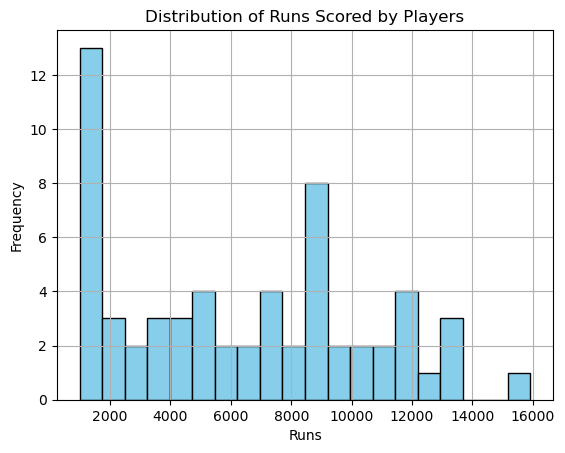

In [127]:
plt.hist(data['Runs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Runs Scored by Players')
plt.xlabel('Runs')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

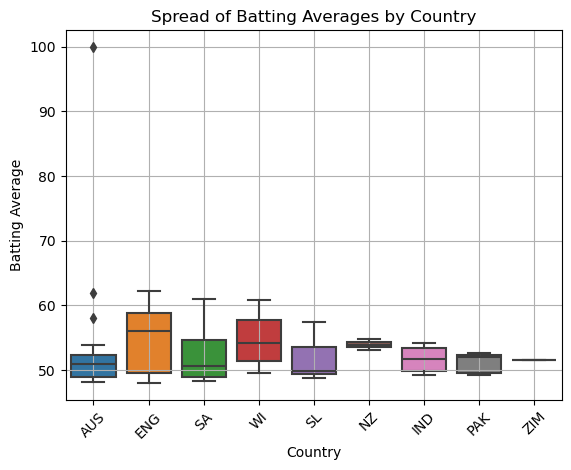

In [128]:
# Create a box plot to visualize the spread of batting averages ('Ave') by country.

sns.boxplot(x='Country', y='Ave', data=data)
plt.title('Spread of Batting Averages by Country')
plt.xlabel('Country')
plt.ylabel('Batting Average')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

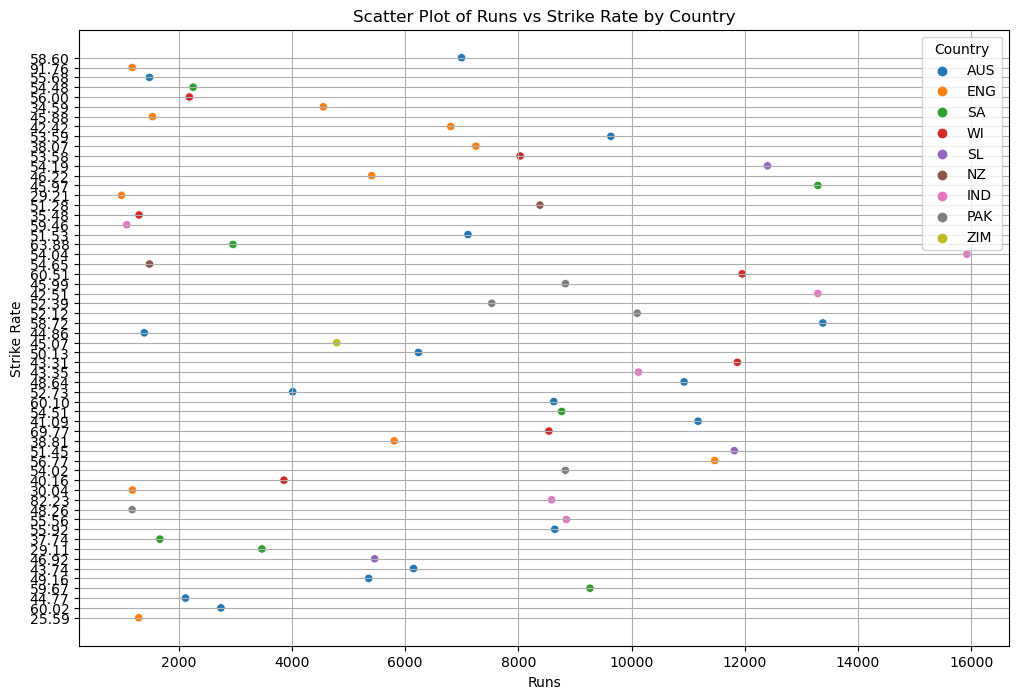

In [130]:
# Plot a scatter plot between 'Runs' and 'SR' with different colors for different countries.
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Runs', y='SR', hue='Country', data=data, palette='tab10')
plt.title('Scatter Plot of Runs vs Strike Rate by Country')
plt.xlabel('Runs')
plt.ylabel('Strike Rate')
plt.legend(title='Country')
plt.grid(True)
plt.show()

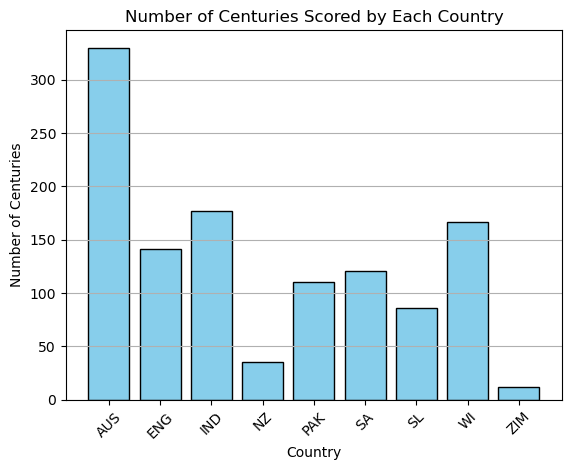

In [131]:
# Create a bar plot showing the number of centuries scored by each country.


centuries_by_country = data.groupby('Country')['100'].sum().reset_index()


plt.bar(centuries_by_country['Country'], centuries_by_country['100'], color='skyblue', edgecolor='black')
plt.title('Number of Centuries Scored by Each Country')
plt.xlabel('Country')
plt.ylabel('Number of Centuries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
